<a href="https://colab.research.google.com/github/rajgupta-github/DeepLearning-with-Python/blob/master/NeuralNetwork/Classification/Text_Classfication_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classify Online Text Review of Amazon Alexa

In [2]:
import tensorflow as tf
import datetime
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext tensorboard

from google.colab import drive
drive.mount('/content/drive')

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [19]:
amazon_reviews = pd.read_csv('/content/drive/My Drive/TensorFlow/amazon_alexa.tsv', sep="\t")
amazon_reviews.describe()
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


No Missing Values

In [20]:
amazon_reviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


1    2893
0     257
Name: feedback, dtype: int64

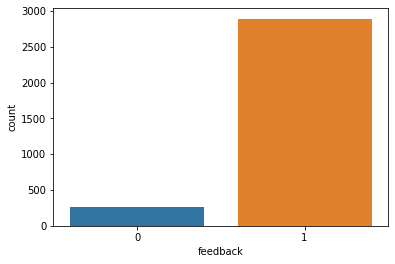

In [21]:
sns.countplot(amazon_reviews['feedback'])
amazon_reviews['feedback'].value_counts()

Imbalanced Dataset Problem

In [22]:
amazon_reviews['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

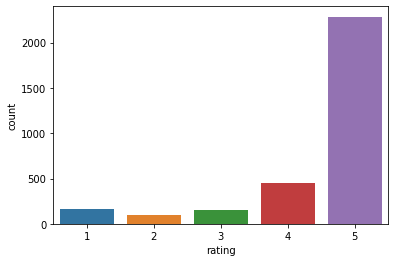

In [23]:
sns.countplot(amazon_reviews['rating'])


In [0]:
amazon_reviews = amazon_reviews.drop(['date', 'rating'],axis=1)


In [0]:
variation_dummies = pd.get_dummies(amazon_reviews['variation'], drop_first = True)

In [0]:
amazon_reviews.drop(['variation'], axis=1, inplace=True)
amazon_reviews = pd.concat([amazon_reviews, variation_dummies], axis=1)

In [30]:
amazon_reviews.columns

Index([                    'feedback',                   'Black  Dot',
                        'Black  Plus',                  'Black  Show',
                        'Black  Spot',             'Charcoal Fabric ',
       'Configuration: Fire TV Stick',         'Heather Gray Fabric ',
                        'Oak Finish ',            'Sandstone Fabric ',
       ...
                                 4034,                           4035,
                                 4036,                           4037,
                                 4038,                           4039,
                                 4040,                           4041,
                                 4042,                           4043],
      dtype='object', length=4060)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(amazon_reviews['verified_reviews'])

In [0]:
amazon_reviews.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(alexa_countvectorizer.toarray())
amazon_reviews = pd.concat([amazon_reviews, reviews], axis=1)


In [0]:
X = amazon_reviews.drop(['feedback'],axis=1)

In [0]:
y = amazon_reviews['feedback']
y = y.values.reshape(-1,1)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2520, 4059)
(630, 4059)
(2520, 1)
(630, 1)


In [37]:
ANN_classifier = tf.keras.models.Sequential()
ANN_classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(X_train.shape[1], )))
ANN_classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
ANN_classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ANN_classifier.summary()
ANN_classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 400)               1624000   
_________________________________________________________________
dense_4 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 401       
Total params: 1,784,801
Trainable params: 1,784,801
Non-trainable params: 0
_________________________________________________________________


In [38]:
epochs_hist = ANN_classifier.fit(X_train, y_train, epochs = 10)

Epoch 1/10
79/79 [==============================] - 1s 14ms/step - loss: 0.2738 - accuracy: 0.9131
Epoch 2/10
79/79 [==============================] - 1s 14ms/step - loss: 0.0889 - accuracy: 0.9655
Epoch 3/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0289 - accuracy: 0.9905
Epoch 4/10
79/79 [==============================] - 1s 14ms/step - loss: 0.0179 - accuracy: 0.9940
Epoch 5/10
79/79 [==============================] - 1s 14ms/step - loss: 0.0165 - accuracy: 0.9929
Epoch 6/10
79/79 [==============================] - 1s 14ms/step - loss: 0.0166 - accuracy: 0.9940
Epoch 7/10
79/79 [==============================] - 1s 14ms/step - loss: 0.0149 - accuracy: 0.9944
Epoch 8/10
79/79 [==============================] - 1s 14ms/step - loss: 0.0165 - accuracy: 0.9925
Epoch 9/10
79/79 [==============================] - 1s 14ms/step - loss: 0.0161 - accuracy: 0.9944
Epoch 10/10
79/79 [==============================] - 1s 14ms/step - loss: 0.0154 - accuracy: 0.9944


In [0]:
 y_pred_train = ANN_classifier.predict(X_train)
 y_pred_train = y_pred_train > 0.5

 y_pred_test = ANN_classifier.predict(X_test)
 y_pred_test = y_pred_test > 0.5

In [62]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y_pred_train))
# confusion_matrix_df.index = ['0','1']
# confusion_matrix_df.columns = ['0','1']
print(confusion_matrix_df)

     0     1
0  188    10
1    3  2319


In [66]:
nn_train_report = classification_report(y_train, y_pred_train)
print(nn_train_report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       198
           1       1.00      1.00      1.00      2322

    accuracy                           0.99      2520
   macro avg       0.99      0.97      0.98      2520
weighted avg       0.99      0.99      0.99      2520



In [69]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
# confusion_matrix_df.index = ['0','1']
# confusion_matrix_df.columns = ['0','1']
print(confusion_matrix_df)

    0    1
0  22   37
1   7  564


In [70]:
nn_test_report = classification_report(y_test, y_pred_test)
print(nn_test_report)

              precision    recall  f1-score   support

           0       0.76      0.37      0.50        59
           1       0.94      0.99      0.96       571

    accuracy                           0.93       630
   macro avg       0.85      0.68      0.73       630
weighted avg       0.92      0.93      0.92       630



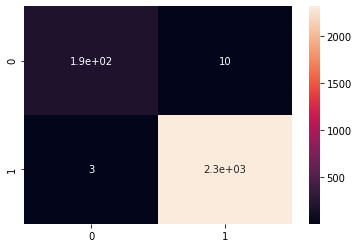

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True)

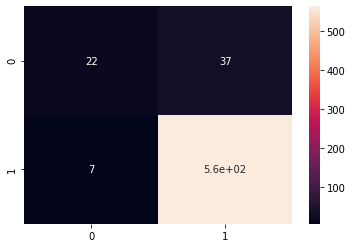

In [40]:
y_pred_test = ANN_classifier.predict(X_test)
y_pred_test

y_pred_test = (y_pred_test > 0.5)

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

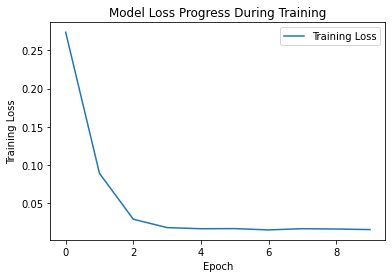

In [41]:
plt.plot(epochs_hist.history['loss'])

plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

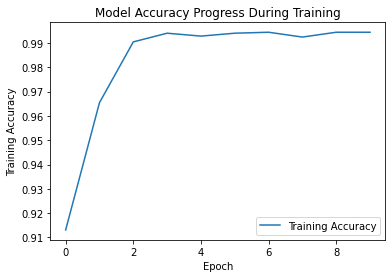

In [42]:
plt.plot(epochs_hist.history['accuracy'])

plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])